In [1]:
import itertools
import pandas as pd
from modules.eval import *

In [ ]:
dft_forces_mace = load('results/mace/MACE-MP-0/dft_forces.pkl')
dft_energies_mace = load('results/mace/MACE-MP-0/dft_energies.pkl')
predicted_forces_mace = load('results/mace/MACE-MP-0/predicted_forces.pkl')
predicted_energies_mace = load('results/mace/MACE-MP-0/predicted_energies.pkl')

dft_forces_mace_nc = load('results/mace/MACE-MPA-0/dft_forces.pkl')
dft_energies_mace_nc = load('results/mace/MACE-MPA-0/dft_energies.pkl')
predicted_forces_mace_nc = load('results/mace/MACE-MPA-0/predicted_forces.pkl')
predicted_energies_mace_nc = load('results/mace/MACE-MPA-0/predicted_energies.pkl')

dft_forces_orb = load('results/orb/dft_forces.pkl')
dft_energies_orb = load('results/orb/dft_energies.pkl')
predicted_forces_orb = load('results/orb/predicted_forces.pkl')
predicted_energies_orb = load('results/orb/predicted_energies.pkl')

dft_forces_deep = load('results/deepmd/DPA3-v1-OpenLAM/dft_forces.pkl')
dft_energies_deep = load('results/deepmd/DPA3-v1-OpenLAM/dft_energies.pkl')
predicted_forces_deep = load('results/deepmd/DPA3-v1-OpenLAM/predicted_forces.pkl')
predicted_energies_deep = load('results/deepmd/DPA3-v1-OpenLAM/predicted_energies.pkl')

dft_forces_grace = load('results/grace/GRACE-2L-OAM/dft_forces.pkl')
dft_energies_grace = load('results/grace/GRACE-2L-OAM/dft_energies.pkl')
predicted_forces_grace = load('results/grace/GRACE-2L-OAM/predicted_forces.pkl')
predicted_energies_grace = load('results/grace/GRACE-2L-OAM/predicted_energies.pkl')

dft_forces_matter = load('results/mattersim/dft_forces.pkl')
dft_energies_matter = load('results/mattersim/dft_energies.pkl')
predicted_forces_matter = load('results/mattersim/predicted_forces.pkl')
predicted_energies_matter = load('results/mattersim/predicted_energies.pkl')

dft_forces_fc = load('results/fair-chem/eqV2-M/final/dft_forces.pkl')
dft_energies_fc = load('results/fair-chem/eqV2-M/final/dft_energies.pkl')
predicted_forces_fc = load('results/fair-chem/eqV2-M/final/predicted_forces.pkl')
predicted_energies_fc = load('results/fair-chem/eqV2-M/final/predicted_energies.pkl')

### Energies

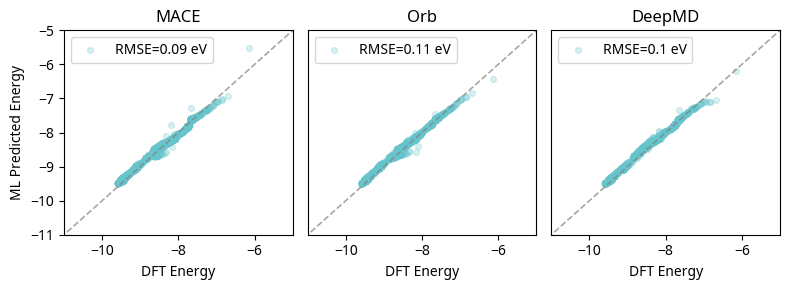

In [3]:
plt.figure(figsize=(8,3))

plt.subplot(131)
plt.title('MACE')
parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV')
plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.subplot(132)
plt.title('Orb')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV')
plt.ylabel(''),plt.yticks([]),plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.subplot(133)
plt.title('DeepMD')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV')
plt.ylabel(''),plt.yticks([]),plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.tight_layout()
plt.show()

In [4]:
r2_mace,mae_mace,rmse_mace = eval_report(np.array(dft_energies_mace),np.array(predicted_energies_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(dft_energies_orb),np.array(predicted_energies_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(dft_energies_deep),np.array(predicted_energies_deep))
r2_grace,mae_grace,rmse_grace = eval_report(np.array(dft_energies_grace),np.array(predicted_energies_grace))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%4f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%4f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.4f'%(rmse_deep,mae_deep,r2_deep))
print('Grace\t%.2f\t%.2f\t%.4f'%(rmse_grace,mae_grace,r2_grace))

Model	RMSE	MAE	R2
----------------------------
MACE	0.09	0.09	0.957527
Orb	0.11	0.10	0.943004
DeepMD	0.10	0.10	0.9493
Grace	0.10	0.10	0.9475


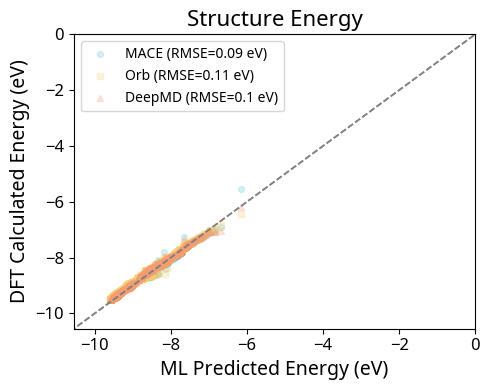

In [5]:
plt.figure(figsize=(5,4))
parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV',style=2,model='DeepMD')
plt.xlim(1.1*min(dft_energies_mace),0),plt.ylim(1.1*min(dft_energies_mace),0)
plt.title('Structure Energy',fontsize=16)
plt.xlabel('ML Predicted Energy (eV)',fontsize=14),plt.ylabel('DFT Calculated Energy (eV)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figures/2_energies.svg',format='svg')
plt.show()

# plt.figure(figsize=(5,4))
# parity_plot(np.array(dft_energies),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
# parity_plot(np.array(dft_energies),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
# plt.xlim(-3000,0),plt.ylim(-3000,0)
# plt.show()

### Forces

In [6]:
for i,atom in enumerate(predicted_forces_fc):
    predicted_forces_fc[i] = [list(atom[0]),atom[1]]

for i,atom in enumerate(dft_forces_fc):
    dft_forces_fc[i] = [list(atom[0]),atom[1]]

pmodule = [i[1] for i in predicted_forces_fc]
dmodule = [i[1] for i in dft_forces_fc]

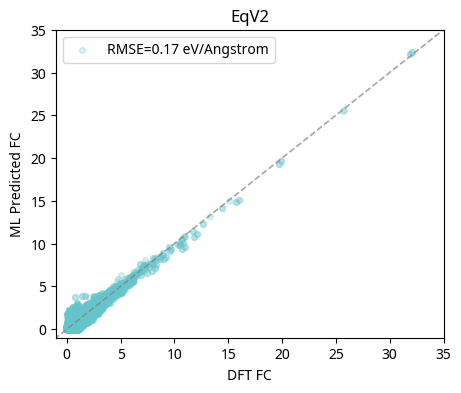

In [19]:
pl,dl=[],[]
for p,d in zip(pmodule,dmodule):
    if p<35:
        pl.append(p)
        dl.append(d)

force_module_fc = pl.copy()
force_module_dft_fc = dl.copy()

plt.figure(figsize=(5,4))
parity_plot(pl,dl,label='FC',unit='eV/Angstrom')
plt.xlim(-1,35),plt.ylim(-1,35)
plt.title('EqV2')
plt.show()

In [8]:
force_module_dft_mace,force_x_dft_mace,force_y_dft_mace,force_z_dft_mace = forces_load(dft_forces_mace)
force_module_mace,force_x_mace,force_y_mace,force_z_mace = forces_load(predicted_forces_mace)

force_module_dft_orb,force_x_dft_orb,force_y_dft_orb,force_z_dft_orb = forces_load(dft_forces_orb)
force_module_orb,force_x_orb,force_y_orb,force_z_orb = forces_load(predicted_forces_orb)

force_module_dft_deep,force_x_dft_deep,force_y_dft_deep,force_z_dft_deep = forces_load(dft_forces_deep)
force_module_deep,force_x_deep,force_y_deep,force_z_deep = forces_load(predicted_forces_deep)

force_module_dft_grace,force_x_dft_grace,force_y_dft_grace,force_z_dft_grace = forces_load(dft_forces_grace)
force_module_grace,force_x_grace,force_y_grace,force_z_grace = forces_load(predicted_forces_grace)

force_module_dft_mace_nc,force_x_dft_mace_nc,force_y_dft_mace_nc,force_z_dft_mace_nc = forces_load(dft_forces_mace_nc)
force_module_mace_nc,force_x_mace_nc,force_y_mace_nc,force_z_mace_nc = forces_load(predicted_forces_mace_nc)

force_module_dft_matter,force_x_dft_matter,force_y_dft_matter,force_z_dft_matter = forces_load(dft_forces_matter)
force_module_matter,force_x_matter,force_y_matter,force_z_matter = forces_load(predicted_forces_matter)

In [9]:
force_module_mace,force_module_dft_mace = forces_treatment(force_module_mace,force_module_dft_mace)
force_x_mace,force_x_dft_mace = forces_treatment(force_x_mace,force_x_dft_mace)
force_y_mace,force_y_dft_mace = forces_treatment(force_y_mace,force_y_dft_mace)
force_z_mace,force_z_dft_mace = forces_treatment(force_z_mace,force_z_dft_mace)

force_module_orb,force_module_dft_orb = forces_treatment(force_module_orb,force_module_dft_orb)
force_x_orb,force_x_dft_orb = forces_treatment(force_x_orb,force_x_dft_orb)
force_y_orb,force_y_dft_orb = forces_treatment(force_y_orb,force_y_dft_orb)
force_z_orb,force_z_dft_orb = forces_treatment(force_z_orb,force_z_dft_orb)

force_module_deep,force_module_dft_deep = forces_treatment(force_module_deep,force_module_dft_deep)
force_x_deep,force_x_dft_deep = forces_treatment(force_x_deep,force_x_dft_deep)
force_y_deep,force_y_dft_deep = forces_treatment(force_y_deep,force_y_dft_deep)
force_z_deep,force_z_dft_deep = forces_treatment(force_z_deep,force_z_dft_deep)

force_module_grace,force_module_dft_grace = forces_treatment(force_module_grace,force_module_dft_grace)
force_x_grace,force_x_dft_grace = forces_treatment(force_x_grace,force_x_dft_grace)
force_y_grace,force_y_dft_grace = forces_treatment(force_y_grace,force_y_dft_grace)
force_z_grace,force_z_dft_grace = forces_treatment(force_z_grace,force_z_dft_grace)

force_module_mace_nc,force_module_dft_mace_nc = forces_treatment(force_module_mace_nc,force_module_dft_mace_nc)
force_x_mace_nc,force_x_dft_mace_nc = forces_treatment(force_x_mace_nc,force_x_dft_mace_nc)
force_y_mace_nc,force_y_dft_mace_nc = forces_treatment(force_y_mace_nc,force_y_dft_mace_nc)
force_z_mace_nc,force_z_dft_mace_nc = forces_treatment(force_z_mace_nc,force_z_dft_mace_nc)

force_module_matter,force_module_dft_matter = forces_treatment(force_module_matter,force_module_dft_matter)
force_x_matter,force_x_dft_matter = forces_treatment(force_x_matter,force_x_dft_matter)
force_y_matter,force_y_dft_matter = forces_treatment(force_y_matter,force_y_dft_matter)
force_z_matter,force_z_dft_matter = forces_treatment(force_z_matter,force_z_dft_matter)

In [10]:
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_module_dft_mace),np.array(force_module_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_module_dft_orb),np.array(force_module_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(force_module_dft_deep),np.array(force_module_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces X')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_x_dft_mace),np.array(force_x_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_x_dft_orb),np.array(force_x_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(force_x_dft_deep),np.array(force_x_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces Y')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_y_dft_mace),np.array(force_y_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_y_dft_orb),np.array(force_y_orb))
r2_deep,mae_fc,rmse_fc = eval_report(np.array(force_y_dft_deep),np.array(force_y_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces Z')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_z_dft_mace),np.array(force_z_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_z_dft_orb),np.array(force_z_orb))
r2_deep,mae_fc,rmse_fc = eval_report(np.array(force_z_dft_deep),np.array(force_z_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

Model	RMSE	MAE	R2
----------------------------
MACE	0.71	0.55	0.26
Orb	0.54	0.44	0.45
DeepMD	0.50	0.39	0.64

Forces X
Model	RMSE	MAE	R2
----------------------------
MACE	0.57	0.43	0.26
Orb	0.51	0.39	0.54
DeepMD	0.33	0.27	0.77

Forces Y
Model	RMSE	MAE	R2
----------------------------
MACE	0.81	0.46	-0.02
Orb	0.40	0.24	0.39
DeepMD	0.33	0.27	0.12

Forces Z
Model	RMSE	MAE	R2
----------------------------
MACE	0.20	0.13	0.79
Orb	0.21	0.14	0.81
DeepMD	0.33	0.27	0.69


/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_42042/1131557028.py:11: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  plt.tight_layout()
/Users/pedrozanineli/Documents/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  fig.canvas.print_figure(bytes_io, **kw)


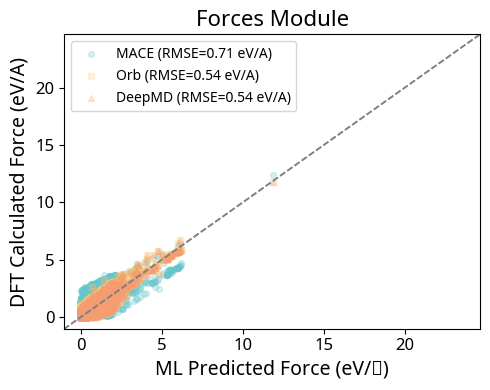

In [11]:
plt.figure(figsize=(5,4))
parity_plot(np.array(force_module_dft_mace),np.array(force_module_mace),'Force','eV/A',model='MACE')
parity_plot(np.array(force_module_dft_orb),np.array(force_module_orb),'Force','eV/A',style=1,model='Orb')
parity_plot(np.array(force_module_dft_deep),np.array(force_module_orb),'Force','eV/A',style=2,model='DeepMD')
plt.xlim(-1,max(np.array(force_module_dft_mace))),plt.ylim(-1,max(np.array(force_module_dft_mace)))

plt.title('Forces Module',fontsize=16)
plt.xlabel('ML Predicted Force (eV/Å)',fontsize=14),plt.ylabel('DFT Calculated Force (eV/A)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figures/3_forces_module.svg',format='svg')
plt.show()

/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_42042/2574859209.py:27: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  plt.tight_layout()
/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_42042/2574859209.py:28: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  plt.savefig('figures/2_2_forces.png',transparent=True,dpi=600)
/Users/pedrozanineli/Documents/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  fig.canvas.print_figure(bytes_io, **kw)


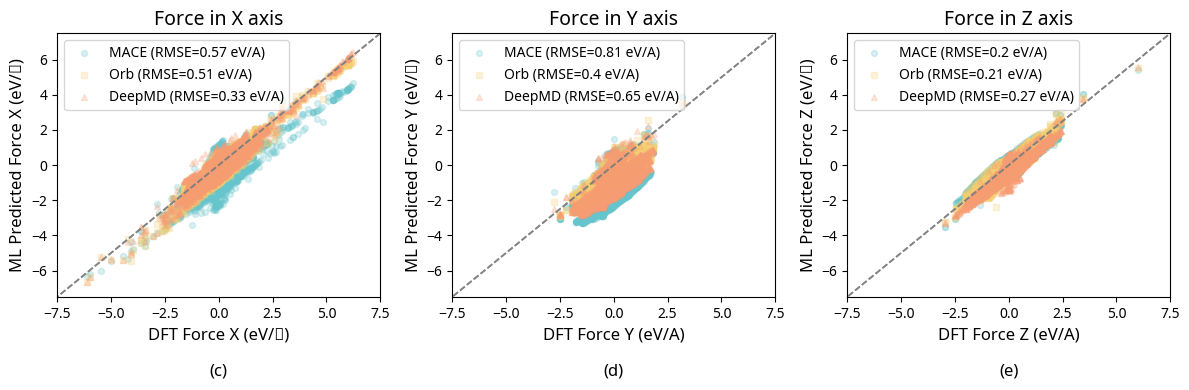

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(131)
parity_plot(np.array(force_x_dft_mace),np.array(force_x_mace),'Force X','eV/A',model='MACE')
parity_plot(np.array(force_x_dft_deep),np.array(force_x_orb),'Force X','eV/A',model='Orb',style=1)
parity_plot(np.array(force_x_dft_deep),np.array(force_x_deep),'Force X','eV/A',model='DeepMD',style=2)
plt.title('Force in X axis',fontsize=14),plt.xlabel('DFT Force X (eV/Å)\n\n(c)',fontsize=12),plt.ylabel('ML Predicted Force X (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)

plt.subplot(132)
parity_plot(np.array(force_y_dft_mace),np.array(force_y_mace),'Force Y','eV/A',model='MACE')
parity_plot(np.array(force_y_dft_deep),np.array(force_y_orb),'Force Y','eV/A',model='Orb',style=1)
parity_plot(np.array(force_y_dft_deep),np.array(force_y_deep),'Force Y','eV/A',model='DeepMD',style=2)
plt.title('Force in Y axis',fontsize=14),plt.xlabel('DFT Force Y (eV/A)\n\n(d)',fontsize=12),plt.ylabel('ML Predicted Force Y (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)
plt.legend(loc='upper left')

plt.subplot(133)

parity_plot(np.array(force_z_dft_mace),np.array(force_z_mace),'Force Z','eV/A',model='MACE')
parity_plot(np.array(force_z_dft_deep),np.array(force_z_orb),'Force Z','eV/A',model='Orb',style=1)
parity_plot(np.array(force_z_dft_deep),np.array(force_z_deep),'Force Z','eV/A',model='DeepMD',style=2)
plt.title('Force in Z axis',fontsize=14),plt.xlabel('DFT Force Z (eV/A)\n\n(e)',fontsize=12),plt.ylabel('ML Predicted Force Z (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/2_2_forces.png',transparent=True,dpi=600)
plt.show()

### Joined Results

/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_42042/1980365806.py:25: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  plt.tight_layout()
/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_42042/1980365806.py:26: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  plt.savefig('figures/2_1_joined_results.png',transparent=True,dpi=600)
/Users/pedrozanineli/Documents/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 197 (\N{LATIN CAPITAL LETTER A WITH RING ABOVE}) missing from font(s) Noto Sans Math.
  fig.canvas.print_figure(bytes_io, **kw)


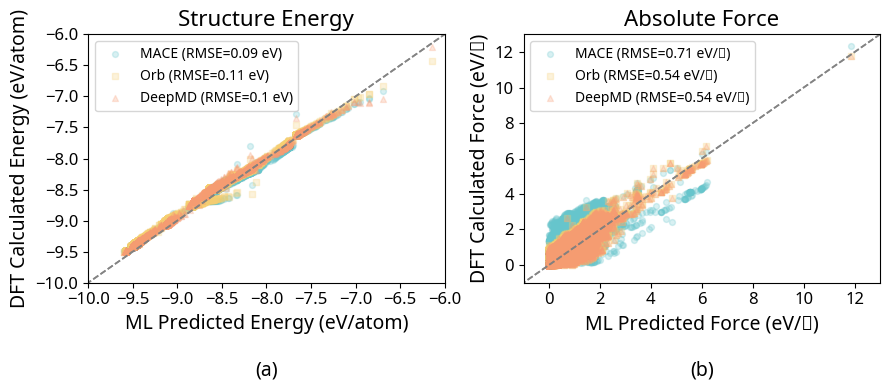

In [13]:
plt.figure(figsize=(9,4))

plt.subplot(121)

parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV',style=2,model='DeepMD')
# plt.xlim(1.1*min(dft_energies_mace),0),plt.ylim(1.1*min(dft_energies_mace),0)
plt.title('Structure Energy',fontsize=16)
plt.xlabel('ML Predicted Energy (eV/atom)\n\n(a)',fontsize=14),plt.ylabel('DFT Calculated Energy (eV/atom)',fontsize=14)
plt.xlim(-10,-6),plt.ylim(-10,-6)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.subplot(122)

parity_plot(np.array(force_module_dft_mace),np.array(force_module_mace),'Force','eV/Å',model='MACE')
parity_plot(np.array(force_module_dft_orb),np.array(force_module_orb),'Force','eV/Å',style=1,model='Orb')
parity_plot(np.array(force_module_dft_deep),np.array(force_module_orb),'Force','eV/Å',style=2,model='DeepMD')
plt.xlim(-1,13),plt.ylim(-1,13)

plt.title('Absolute Force',fontsize=16)
plt.xlabel('ML Predicted Force (eV/Å)\n\n(b)',fontsize=14),plt.ylabel('DFT Calculated Force (eV/Å)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/2_1_joined_results.png',transparent=True,dpi=600)
plt.show()

### Error Visualization

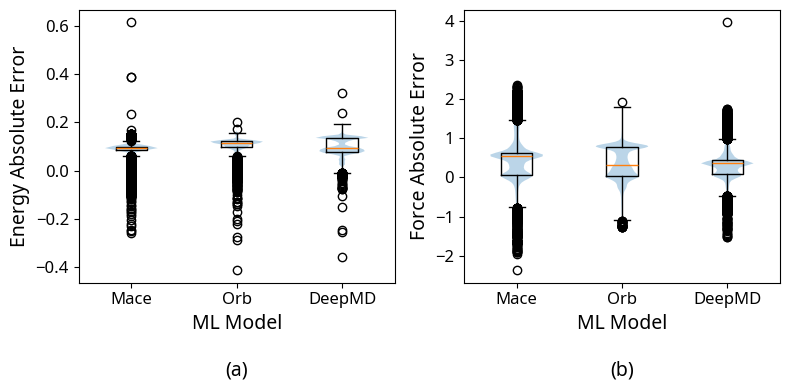

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(121)
error_visualization([
    ['Mace',[dft_energies_mace,predicted_energies_mace]],
    ['Orb',[dft_energies_orb,predicted_energies_orb]],
    ['DeepMD',[dft_energies_deep,predicted_energies_deep]],
])

plt.xlabel('ML Model\n\n(a)',fontsize=14),plt.ylabel('Energy Absolute Error',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.subplot(122)
error_visualization([
    ['Mace',[force_module_dft_mace,force_module_mace]],
    ['Orb',[force_module_dft_orb,force_module_orb]],
    ['DeepMD',[force_module_dft_deep,force_module_deep]],
])

plt.xlabel('ML Model\n\n(b)',fontsize=14),plt.ylabel('Force Absolute Error',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/3_error.png',dpi=500,transparent=True)
plt.show()

### Latex Table

In [15]:
def latex_table_results(energies,forces,models,non_compliant):

    rows = []
    for model_energy,model_force,model,n in zip(energies,forces,models,non_compliant):
        
        e_r2,e_mae,e_rmse = eval_report(model_energy[0],model_energy[1])
        f_r2,f_mae,f_rmse = eval_report(model_force[0],model_force[1])

        row = [n,model,round(e_rmse,2),round(e_mae,2),round(e_r2,2),round(f_rmse,2),round(f_mae,2),round(f_r2,2)]
        
        rows.append(row)

    bold_indexes = []
    for i,row in enumerate(rows):

        if i == 0:
            e_rmse,e_mae,e_r2,f_rmse,f_mae,f_r2 = row[2:]
            bold_indexes = 6*[0]
        else:
            e_rmse_aux,e_mae_aux,e_r2_aux,f_rmse_aux,f_mae_aux,f_r2_aux = row[2:]

        def compare(curr,aux,curr_index,index,minor=True):
            if minor:
                if curr > aux:
                    curr = aux
                    bold_indexes[curr_index] = index
            else:
                if curr < aux:
                    curr = aux
                    bold_indexes[curr_index] = index
            return curr
        
        if i != 0:
            e_rmse = compare(e_rmse,e_rmse_aux,0,i,minor=True)
            e_mae = compare(e_mae,e_mae_aux,1,i,minor=True)
            e_r2 = compare(e_r2,e_r2_aux,2,i,minor=False)
            f_rmse = compare(f_rmse,f_rmse_aux,3,i,minor=True)
            f_mae = compare(f_mae,f_mae_aux,4,i,minor=True)
            f_r2 = compare(f_r2,f_r2_aux,5,i,minor=False)
            
    for i,row in enumerate(rows):
        
        n,model,e_rmse,e_mae,e_r2,f_rmse,f_mae,f_r2 = row
        
        for j,value in enumerate(row):

            if j == 0: 
                if n: print(f'S-{model}',end=' & ')
                else: print(f'{model}',end=' & ')
            
            if j > 1:
                if i == bold_indexes[j-2]:
                    if j+1 != len(row): print('\\textbf','{',value,'}',end=' & ')
                    else: print('\\textbf','{',value,'}',end=' \\\\')
                elif j+1 != len(row): print(value,end=' & ')
                else: print(value,end=' \\\\')

        print()

In [33]:
latex_table_results(
    energies = [
        
        [np.array(dft_energies_fc),np.array(predicted_energies_fc)],
        [np.array(dft_energies_deep),np.array(predicted_energies_deep)],
        [np.array(dft_energies_grace),np.array(predicted_energies_grace)],
        [np.array(dft_energies_orb),np.array(predicted_energies_orb)],

        [np.array(dft_energies_mace),np.array(predicted_energies_mace)],
        [np.array(dft_energies_mace_nc),np.array(predicted_energies_mace_nc)],
        [np.array(dft_energies_matter),np.array(predicted_energies_matter)]],

    forces = [
        [np.array(force_module_dft_fc),np.array(force_module_fc)],
        [np.array(force_module_dft_deep),np.array(force_module_deep)],
        [np.array(force_module_dft_grace),np.array(force_module_grace)],
        [np.array(force_module_dft_orb),np.array(force_module_orb)],
        [np.array(force_module_dft_matter),np.array(force_module_matter)],
        [np.array(force_module_dft_mace_nc),np.array(force_module_mace_nc)],
        [np.array(force_module_dft_mace),np.array(force_module_mace)]],

    models = ['eqV2-M','DeepMD','Grace','ORB','MatterSim','MACE-MPA-0','Mace-MP-0'],

    database = ['3.37M','6.6M','6.6M','3.25M','3.37M','17M','146k'],
    params = ['86.6M','8.18M','12.6M','25.2M','9.06M','4.55M','4.69M'],
    
    non_compliant = [True,False,True,True,True,True,False]

)

eqV2-M $\star$ & \textbf { 3.37M } & \textbf { 86.6M } & \textbf { 0.9869 } & \textbf { 0.0286 } & \textbf { 0.0632 } & \textbf { 0.9201 } & \textbf { 0.1083 } & \textbf { 0.1697 }\\
DeepMD & 6.6M & 8.18M & 0.9493 & 0.0985 & 0.1041 & 0.6364 & 0.391 & 0.5025\\
Grace $\star$ & 6.6M & 12.6M & 0.9475 & 0.0992 & 0.1026 & 0.3756 & 0.4865 & 0.5836\\
ORB $\star$ & 3.25M & 25.2M & 0.943 & 0.1034 & 0.1077 & 0.4501 & 0.4361 & 0.5392\\
MatterSim $\star$ & 3.37M & 9.06M & 0.9575 & 0.0877 & 0.091 & 0.6787 & 0.3305 & 0.5111\\
MACE-MPA-0 $\star$ & 17M & 4.55M & 0.9163 & 0.1324 & 0.1378 & -0.1097 & 0.69 & 0.8517\\
Mace-MP-0 & 146k & 4.69M & 0.9281 & 0.1171 & 0.1213 & 0.2611 & 0.553 & 0.7076\\
